# Mixed (invasion) Percolation

In [1]:
import openpnm as op
from openpnm.algorithms import MixedInvasionPercolation as mp
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, IntSlider
%matplotlib inline

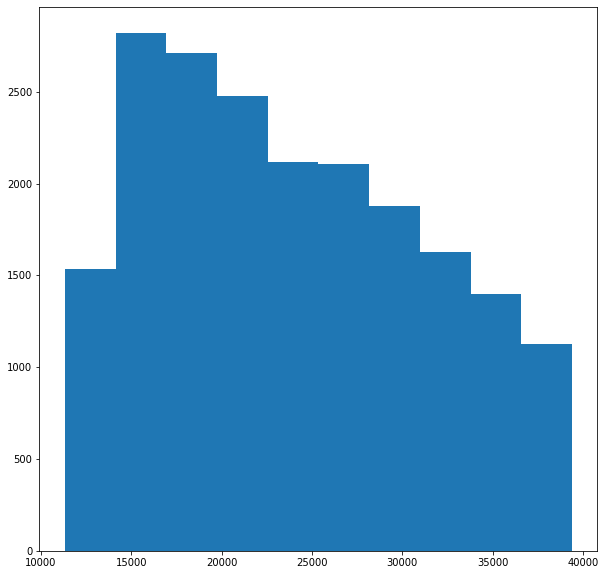

In [2]:
N = 100
net = op.network.Cubic(shape=[N, N, 1], spacing=2.5e-5)
geom = op.geometry.StickAndBall(network=net, pores=net.Ps, throats=net.Ts)
water = op.phases.Water(network=net)
phys = op.physics.Standard(network=net, phase=water, geometry=geom)
phys['pore.entry_pressure'] = 0.0
fig, ax = plt.subplots(figsize=[10, 10])
ax.hist(phys['throat.entry_pressure'])
plt.show()

In [3]:
def run_mp(trapping=False, residual=False, snap_off=False, plot=True, flowrate=None):
    alg = mp(network=net)
    if snap_off:
        alg.settings['snap_off'] = 'throat.snap_off'
    alg.setup(phase=water)
    alg.set_inlets(pores=net.pores('left'))
    if residual:
        alg.set_residual(pores=water['pore.occupancy'])
    alg.run()
    if trapping:
        alg.set_outlets(net.pores('right'))
        alg.apply_trapping()
    inv_points = np.arange(0, 100, 1)
    # returns data as well as plotting
    alg_data = alg.get_intrusion_data(inv_points=inv_points)
    water.update(alg.results(Pc=inv_points.max()))
    if plot:
        fig, ax = plt.subplots(figsize=[10, 10])
        L = np.sqrt(net.Np).astype(int)
        ax.imshow(alg['pore.invasion_sequence'].reshape([L, L]),
                   cmap=plt.get_cmap('Blues'))
        plt.show()
    if flowrate is not None:
        alg.apply_flow(flowrate=flowrate)
    return alg

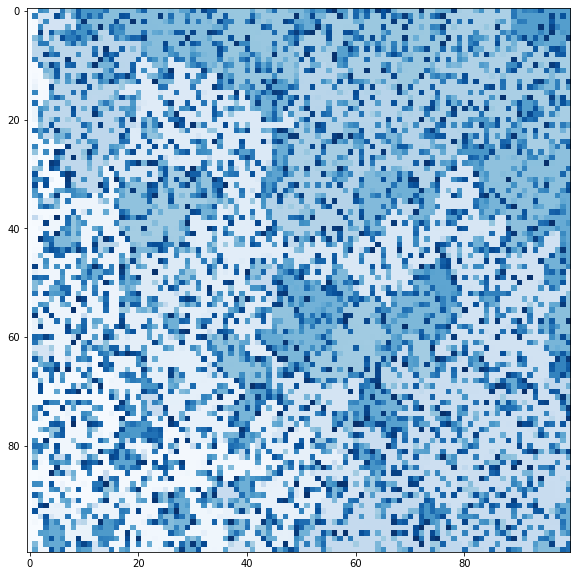

In [4]:
alg1 = run_mp()

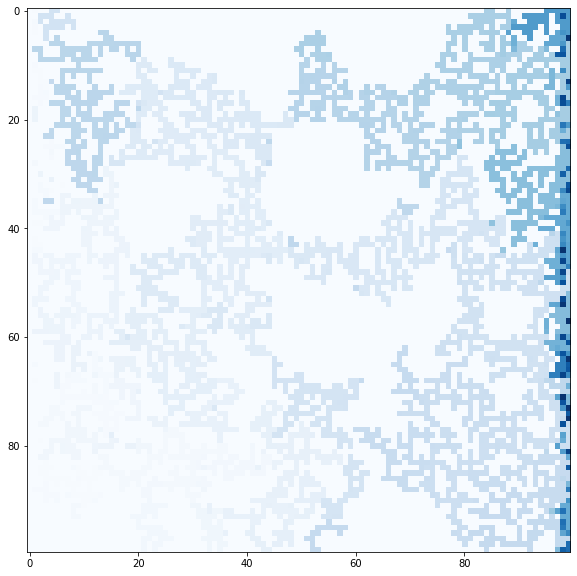

In [5]:
alg2 = run_mp(trapping=True)

c:\code\openpnm-working\openpnm\algorithms\MixedInvasionPercolation.py:548: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  a = fig.add_subplot(111)


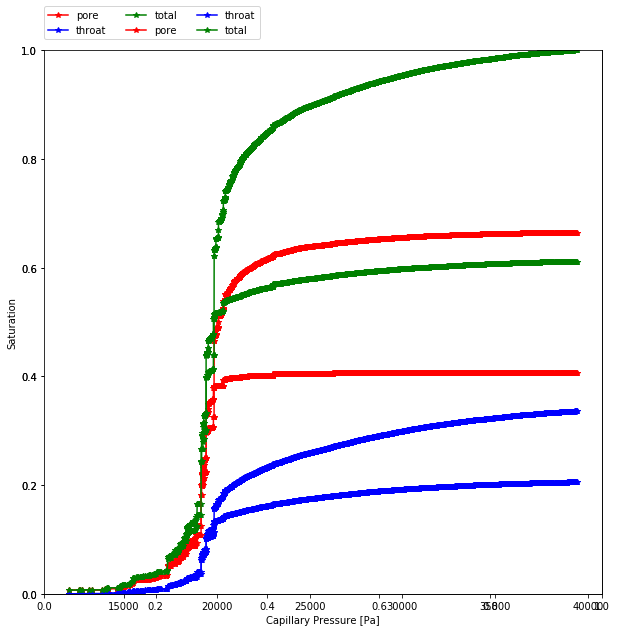

In [6]:
fig, ax = plt.subplots(figsize=[10, 10])
fig = alg1.plot_intrusion_curve(fig)
fig = alg2.plot_intrusion_curve(fig)